In [113]:
import numpy as np
import pandas as pd 
import os 
import KT 
import time
import matplotlib.pyplot as plt 
import scipy.constants as pc
import astropy.constants as ac
import warnings
warnings.filterwarnings('ignore')

In [114]:
base_dir = 'Agate'
f_path = os.path.join(base_dir, 'final_agate.csv')
LISA_nc_path = os.path.join(base_dir,'LISA2018_esaSTD.csv')

In [115]:
df = pd.read_csv(f_path)

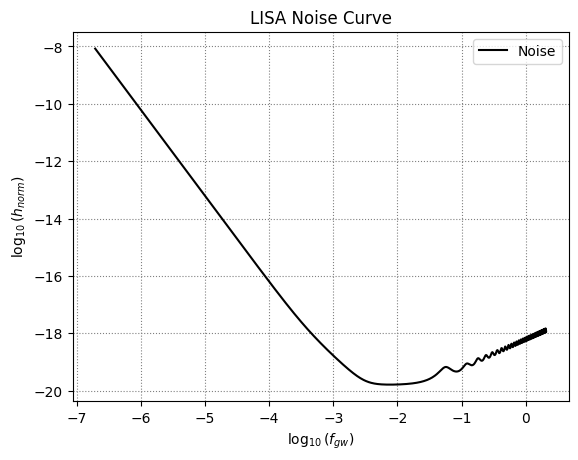

In [116]:
#First, lets take a look at the infamous noise curve
dat = np.loadtxt(LISA_nc_path,delimiter=',')
f = dat[:,0] #frequency points in noisecurve (hz)
noise = dat[:,1] #h_norm points (SI–momentum^2 if I remember correctly)
fig, ax = plt.subplots()
ax.grid(color='grey',ls='dotted')
ax.set_xlabel(r'$\log_{10}(f_{gw})$')
ax.set_ylabel(r'$\log_{10}(h_{norm})$')
ax.set_title('LISA Noise Curve')
ax.plot(np.log10(f),np.log10(noise),color='black',label='Noise')
ax.legend()

In [117]:
help(KT.snr)

Help on function snr in module KT:

snr(df, nc_file, t_observation=1)
    Calculate the LISA signal to noise ratio for all systems in the given df from a LISA noise curve file, assuming they are all monochrome.
    The monochrome assumption is because we need to think more closely about how to treat mass transfer chirping sources, which will need to be treated differently then inspiral chirping systems.
    
    df: dataframe to calculate the signal to noise ratio for.
    nc_file: path to noise curve file
    t_observation: LISA observation time in years
    
    Returns: numpy array with signal to noise ratios for each system in df, as well as an array detailing whether the system should be chirping, and needs to be treated in more detail.



In [118]:
snr, is_monochrome = KT.snr(df, LISA_nc_path,t_observation=10)

In [119]:
df['snr'] = snr
df['is_monochrome'] = is_monochrome

In [120]:
help(KT.plot_boundaries)

Help on function plot_boundaries in module KT:

plot_boundaries(fig, ax)
    Plot KT boundaries
    
    fig: figure
    ax: matplotlib axis
    
    Returns: fig, ax



In [121]:
help(KT.plot_by_kstar)

Help on function plot_by_kstar in module KT:

plot_by_kstar(fig, ax, df)
    Create a KT diagram from a df with f_gw and rh_norm columns color coded by kstar-kstar.
    
    fig: mpl figure
    ax: mpl ax
    (e.g. from fig, ax = plt.subplots())
    df: dataframe with kstar1, kstar2, f_gw, rh_norm columns
    
    Returns: fig, ax



(-4.0, -1.0)

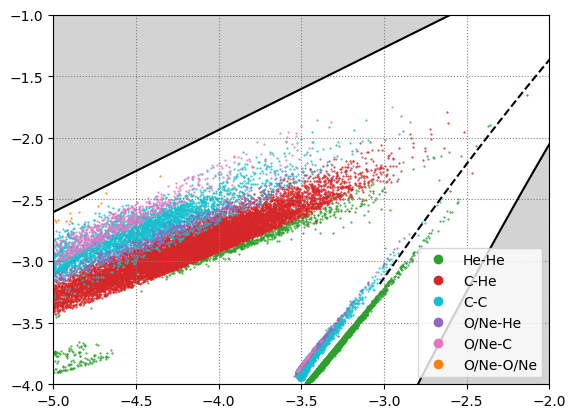

In [122]:
#Here is our KT plot with no SNR analysis...
fig, ax = plt.subplots()
fig, ax = KT.plot_boundaries(fig, ax)
fig, ax = KT.plot_by_kstar(fig,ax,df)
ax.grid(color='grey',ls='dotted')
ax.set_xlim((-5,-2))
ax.set_ylim((-4,-1))

In [123]:
df = df[df.snr > 1]
len(df)

209

(-3.0, -1.0)

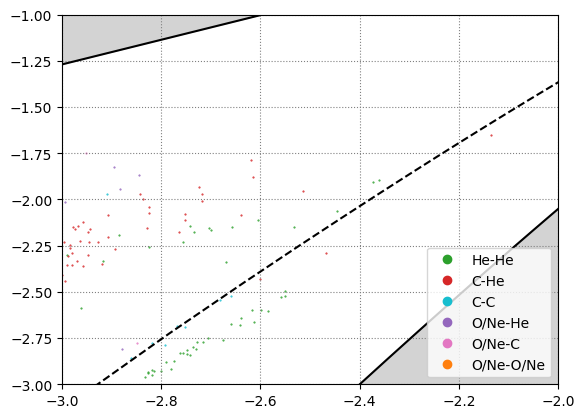

In [124]:
#...And with SNR analysis
fig, ax = plt.subplots()
KT.plot_boundaries(fig, ax)
KT.plot_by_kstar(fig,ax,df)
ax.grid(color='grey',ls='dotted')
ax.set_xlim((-3,-2))
ax.set_ylim((-3,-1))

SNR ruins everything... this is with an incredibly optimistic 10 year mission as well! More will be visible when we have our galaxy though.